Question 1: What is Simple Linear Regression?

Answer: Simple Linear Regression is a statistical method used to model the linear relationship between one independent variable (predictor, X) and one dependent variable (response, Y) by fitting a straight line to observed data. The goal is to predict the value of Y for a given value of X

Question 2: What are the key assumptions of Simple Linear Regression?

Answer: Linearity: The relationship between X and Y is linear.

Independence: The residuals (errors) are independent.

Homoscedasticity: The residuals have constant variance across values of X.

Normality: The residuals are normally distributed.

No major outliers: Outliers should not have undue influence on the model

Question 3: What is heteroscedasticity, and why is it important to address in regression models?

Answers: Heteroscedasticity occurs when the residuals (errors) of a regression model exhibit non constant variance across values of the independent variable. It violates the homoscedasticity assumption, resulting in unreliable statistical inference specifically, it can inflate the variance of coefficient estimates and lead to incorrect conclusions about predictor significance

Question 4: What is Multiple Linear Regression?

Answer: Multiple Linear Regression extends the concept of simple linear regression to involve two or more independent variables. It models the linear relationship between several predictors and a continuous dependent variable using the equation

Question 5: What is polynomial regression, and how does it differ from linear
regression?

Answer: Polynomial regression models the relationship between the independent and dependent variables as an nth-degree polynomial, allowing for nonlinear relationships. Unlike simple linear regression, which fits a straight line, polynomial regression can fit curves by including higher powers of X





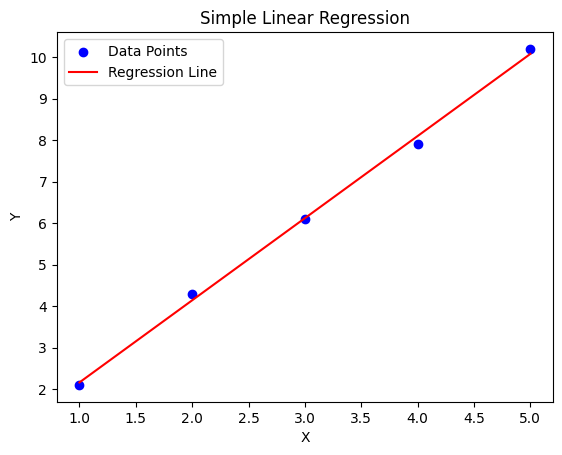

In [1]:
#Question 6: Implement a Python program to fit a Simple Linear Regression model to
#the following sample data:
#● X = [1, 2, 3, 4, 5]
#● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
#Plot the regression line over the data points.

#Answer:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()



In [2]:
#Question 7: Fit a Multiple Linear Regression model on this sample data:
#● Area = [1200, 1500, 1800, 2000]
#● Rooms = [2, 3, 3, 4]
#● Price = [250000, 300000, 320000, 370000]






import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor


data = pd.DataFrame({
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
})

X = data[['Area', 'Rooms']]
y = data['Price']

# Fit model
model = LinearRegression().fit(X, y)


vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


  feature         VIF
0    Area  127.796923
1   Rooms  127.796923


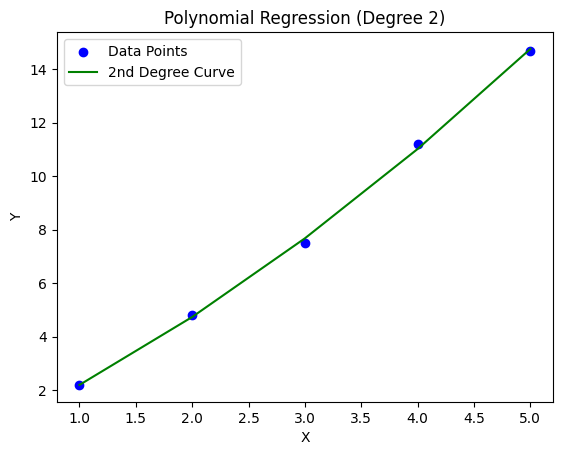

In [3]:
#Question 8: Implement polynomial regression on the following data:
#● X = [1, 2, 3, 4, 5]
#● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
#Fit a 2nd-degree polynomial and plot the resulting curve.

#answer

from sklearn.preprocessing import PolynomialFeatures

X = np.array([1,2,3,4,5]).reshape(-1,1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, Y)
Y_poly_pred = model.predict(X_poly)

plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_poly_pred, color='green', label='2nd Degree Curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.show()


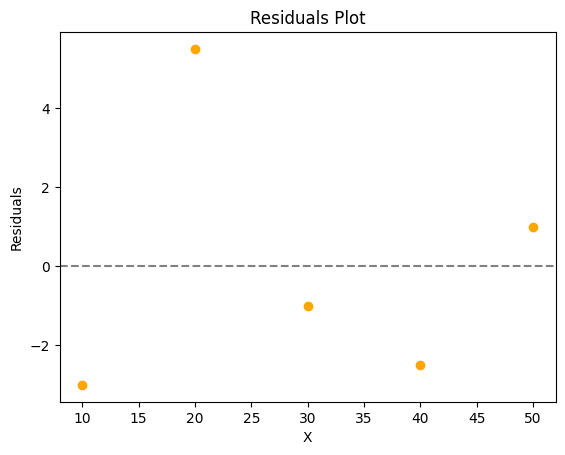

In [4]:
#Question 9: Create a residuals plot for a regression model trained on this data:
#● X = [10, 20, 30, 40, 50]
#● Y = [15, 35, 40, 50, 65]
#Assess heteroscedasticity by examining the spread of residuals.
#Answer:

X = np.array([10, 20, 30, 40, 50]).reshape(-1,1)
Y = np.array([15, 35, 40, 50, 65])

model = LinearRegression().fit(X, Y)
Y_pred = model.predict(X)
residuals = Y - Y_pred

plt.scatter(X, residuals, color='orange')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


Question 10: Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust model.

Answer: If I were working as a data scientist for a real estate company and needed to predict house prices using features like area, number of rooms, and location but detected both heteroscedasticity and multicollinearity in my regression model here’s how I would handle these challenges to ensure a robust model:

First, for heteroscedasticity (uneven error spread), I would plot the residuals and, if the variance is not constant, apply a transformation like taking the log of house prices, or use robust regression methods that make the model less sensitive to this issue.

For multicollinearity (predictors highly correlated), I would check VIF values and look at correlations. If predictors like area and rooms are very correlated, I would either remove one, combine them, or use regularization (like Ridge or Lasso regression) to reduce the effect.

Finally, after these corrections, I would re-check assumptions, review model fit with cross-validation, and only then trust the predictions from my regression model